##Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.svm import SVC

##Load the dataset

In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/BRCA.csv')

##Data preprocessing

In [ ]:
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [ ]:
data.tail()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data.isnull().sum())

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [ ]:
data=data.dropna()

In [ ]:
print(data.isnull().sum())

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [ ]:
data.Gender.value_counts()

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

##Data visualization

In [ ]:
stage=data["Tumour_Stage"].value_counts()
transactions=stage.index
quantity=stage.values

figure=px.pie(data,values=quantity,names=transactions,hole=0.5,title="Tumor Stage of Patients")
figure.show()

In [ ]:
histology=data["Histology"].value_counts()
transactions=histology.index
quantity=histology.values

figure=px.pie(data,values=quantity,names=transactions,hole=0.5,title="Histology of Patients")
figure.show()

In [ ]:
surgery=data["Surgery_type"].value_counts()
transactions=surgery.index
quantity=surgery.values

figure=px.pie(data,values=quantity,names=transactions,hole=0.5,title="Surgery Type of Patients")
figure.show()

##EDA-Exploratary Data Analysis

In [ ]:
data["Tumour_Stage"] = data["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
data["Histology"] = data["Histology"].map({"Infiltrating Ductal Carcinoma": 1,
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
data["ER status"] = data["ER status"].map({"Positive": 1})
data["PR status"] = data["PR status"].map({"Positive": 1})
data["HER2 status"] = data["HER2 status"].map({"Positive": 1, "Negative": 2})
data["Gender"] = data["Gender"].map({"MALE": 0, "FEMALE": 1})
data["Surgery_type"] = data["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2,
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
print(data.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0       1  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0       1 -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0       1  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0       1  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0       1  0.221550   1.90680   0.52045 -0.311990   

   Tumour_Stage  Histology  ER status  PR status  HER2 status  Surgery_type  \
0             3          1          1          1            2             2   
1             2          3          1          1            2             3   
2             3          1          1          1            2             1   
3             2          1          1          1            2             2   
4             2          1          1          1            2             1   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       15-Jan-17          19-Ju

##Correlation Heatmap

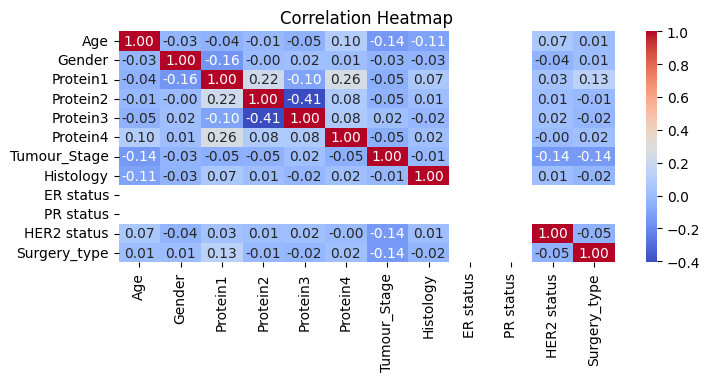

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the 'Patient_ID' column from the correlation matrix
corr_matrix = data.drop(columns=["Patient_ID","Date_of_Surgery","Date_of_Last_Visit","Patient_Status"]).corr()

# Heatmap of correlations
plt.figure(figsize=(8, 3))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##Splitting the data

In [ ]:
X = np.array(data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4',
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status',
                   'HER2 status', 'Surgery_type']])
y = np.array(data[['Patient_Status']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##Load the models

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

##Evaluating the models

In [ ]:
accuracy_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC Accuracy: 0.83
Random Forest Accuracy: 0.83
Logistic Regression Accuracy: 0.83
K-Nearest Neighbors Accuracy: 0.78


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
# Comparing the accuracies
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

In [ ]:
figure = px.bar(accuracy_df, x='Model', y='Accuracy', title='Model Accuracy Comparison')
figure.show()

##Prediction

In [ ]:
# features = ['Age','Gender','Protein1','Protein2','Protein3','Protein4','Tumour_Stage','Histology','ER status','PR status','HER2 status','Surgery_type']
features = np.array([[52.9, 1, 0.080353, 0.42638, 0.54715, 0.273680, 2, 1, 1, 1, 2, 2]])
print(model.predict(features))

['Alive']
